In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
DF = pd.read_csv('FastFood-1.csv')

In [3]:
DF.head()

,FastFoodNames,Sales
0,1,2600.0
1,1,1483.8
2,1,1195.0
3,1,1470.0
4,1,903.4


In [5]:
DF.describe()

,FastFoodNames,Sales
count,24.00000,24.000000
mean,2.50000,1279.108333
std,1.14208,737.871272
min,1.00000,345.000000
25%,1.75000,866.350000
50%,2.50000,1088.600000
75%,3.25000,1477.200000
max,4.00000,3158.000000


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FastFoodNames  24 non-null     int64  
 1   Sales          24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [7]:
DF.FastFoodNames = pd.Categorical(DF.FastFoodNames)

In [8]:
DF.FastFoodNames.value_counts()

4    6
3    6
2    6
1    6
Name: FastFoodNames, dtype: int64

In [9]:
formula = 'Sales ~ C(FastFoodNames)' # + means and
model = ols(formula, DF).fit() # formula fitted into ordinary least squares, algorithm formula put into a model
# calculates sums of squares and means sums of square amd p-value etc.
aov_table = anova_lm(model)
print(aov_table)

                    df        sum_sq        mean_sq         F    PR(>F)
C(FastFoodNames)   3.0  2.771659e+06  923886.427222  1.894999  0.162978
Residual          20.0  9.750783e+06  487539.152833       NaN       NaN


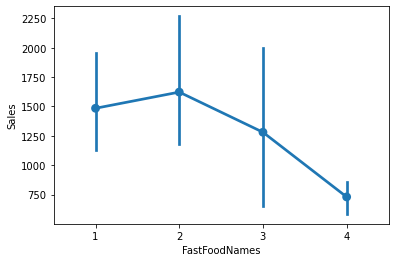

In [11]:
sns.pointplot(x='FastFoodNames', y='Sales', data=DF);

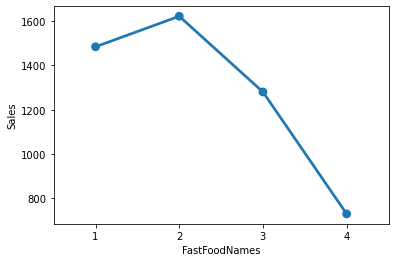

In [12]:
sns.pointplot(x='FastFoodNames', y='Sales', data=DF, ci=None);

In [13]:
formula = 'Sales ~ Sales:C(FastFoodNames)'
# : represents interaction
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df        sum_sq       mean_sq             F  \
Sales:C(FastFoodNames)   4.0  1.252244e+07  3.130611e+06  3.442609e+29   
Residual                19.0  1.727806e-22  9.093715e-24           NaN   

                               PR(>F)  
Sales:C(FastFoodNames)  7.068793e-274  
Residual                          NaN  


In [15]:
DF['Sales'].describe().transpose()

count      24.000000
mean     1279.108333
std       737.871272
min       345.000000
25%       866.350000
50%      1088.600000
75%      1477.200000
max      3158.000000
Name: Sales, dtype: float64

<IPython.core.display.Javascript object>

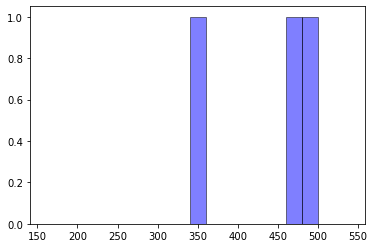

In [16]:
bin_edges = np.arange(160, 560, 20)
plt.hist(DF.Sales,
 bins=bin_edges,
 density=False,
 histtype='bar',
 color='b',
 edgecolor='k',
 alpha=0.5);

<IPython.core.display.Javascript object>

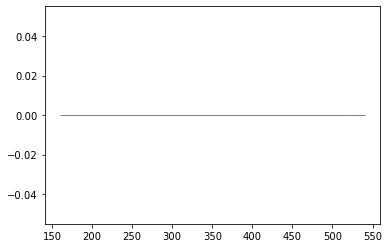

In [17]:
bin_edges = np.arange(160, 560, 20)
plt.hist(DF.FastFoodNames,
 bins=bin_edges,
 density=False,
 histtype='bar',
 color='b',
 edgecolor='k',
 alpha=0.5);

<IPython.core.display.Javascript object>

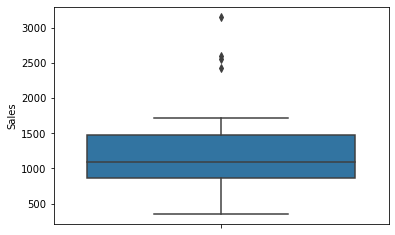

In [18]:
sns.boxplot(DF['Sales'] , orient = 'v')
plt.show()

In [20]:
DF['Sales'].value_counts()

878.8     1
993.2     1
1195.0    1
1470.0    1
3158.0    1
957.0     1
1242.0    1
1717.5    1
1475.0    1
1184.0    1
481.0     1
1483.8    1
1254.2    1
345.0     1
883.0     1
829.0     1
903.4     1
465.0     1
710.2     1
2556.4    1
915.0     1
574.9     1
2427.2    1
2600.0    1
Name: Sales, dtype: int64

In [21]:
#Aussmption 1: Normality
from scipy import stats
w, p_value = stats.shapiro(DF['Sales'])
print("W = {}".format(w), "p_value = {}".format(p_value))

W = 0.88081955909729 p_value = 0.008632151409983635


In [22]:
# Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

In [27]:
## post hoc test
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
MultiComp=MultiComparison(DF['Sales'],DF['FastFoodNames'])
print(MultiComp.tukeyhsd().summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2    137.85    0.9  -990.5326 1266.2326  False
     1      3 -204.1333    0.9 -1332.5159  924.2492  False
     1      4 -754.8833  0.271 -1883.2659  373.4992  False
     2      3 -341.9833 0.8138 -1470.3659  786.3992  False
     2      4 -892.7333 0.1535 -2021.1159  235.6492  False
     3      4   -550.75 0.5312 -1679.1326  577.6326  False
----------------------------------------------------------


In [2]:
DF = pd.read_csv('FastFood-1.csv')
df_new = pd.melt(DF, id_vars = 'FastFoodNames')
df_new.head()
df_new

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,FastFoodNames,variable,value
0,1,Sales,2600.0
1,1,Sales,1483.8
2,1,Sales,1195.0
3,1,Sales,1470.0
4,1,Sales,903.4
5,1,Sales,1254.2
6,2,Sales,3158.0
7,2,Sales,957.0
8,2,Sales,1242.0
9,2,Sales,1717.5


In [3]:
ind_value = np.arange(1,25)

<IPython.core.display.Javascript object>

In [4]:
ind_value = pd.DataFrame(ind_value)
ind_value.shape

<IPython.core.display.Javascript object>

(24, 1)

In [5]:
df_new.shape

(24, 3)

In [9]:
# df_new.insert(1, 'index', ind_value)

In [14]:
df_new.head()

,FastFoodNames,index,variable,value
0,1,1,Sales,2600.0
1,1,2,Sales,1483.8
2,1,3,Sales,1195.0
3,1,4,Sales,1470.0
4,1,5,Sales,903.4


In [12]:
df_new.loc[df_new.FastFoodNames == 'FastFoodNames2', 'index'] = df_new[df_new.FastFoodNames == 'FastFoodNames2']['index']-6
df_new.loc[df_new.FastFoodNames == 'FastFoodNames3', 'index'] = df_new[df_new.FastFoodNames == 'FastFoodNames3']['index']-12
df_new.loc[df_new.FastFoodNames == 'FastFoodNames4', 'index'] = df_new[df_new.FastFoodNames == 'FastFoodNames4']['index']-18
df_new

,FastFoodNames,index,variable,value
0,1,1,Sales,2600.0
1,1,2,Sales,1483.8
2,1,3,Sales,1195.0
3,1,4,Sales,1470.0
4,1,5,Sales,903.4
5,1,6,Sales,1254.2
6,2,7,Sales,3158.0
7,2,8,Sales,957.0
8,2,9,Sales,1242.0
9,2,10,Sales,1717.5


In [15]:
146.83-53.73

93.10000000000002

In [17]:
93.10000000000002/58

1.6051724137931038

In [18]:
146.83+53.73/(58)

147.75637931034484

In [20]:
415.33-(146.83+53.73)

214.76999999999998

In [23]:
214.76999999999998/59

3.6401694915254232

In [24]:
146.83+53.73

200.56

In [25]:
415.33-200.56

214.76999999999998

In [29]:
214.76999999999998/58

3.7029310344827584